In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
def read_csv(filename):
    x_values = []
    y_values = []
    line_count = 0  # Variável para contar as linhas (excluindo o cabeçalho)

    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # Lê o cabeçalho do CSV
        
        for row in csv_reader:
            x = float(row[0]) if row[0] else None
            y = float(row[1]) if row[1] else None
            
            x_values.append(x)
            y_values.append(y)
            line_count += 1
    
    # Substitui os valores nulos pela média da coluna
    x_mean = np.mean([x for x in x_values if x is not None])
    y_mean = np.mean([y for y in y_values if y is not None])
    
    x_values = [x if x is not None else x_mean for x in x_values]
    y_values = [y if y is not None else y_mean for y in y_values]
    
    return x_values, y_values, line_count

In [13]:
x, y, qtd = read_csv('parabola.csv')

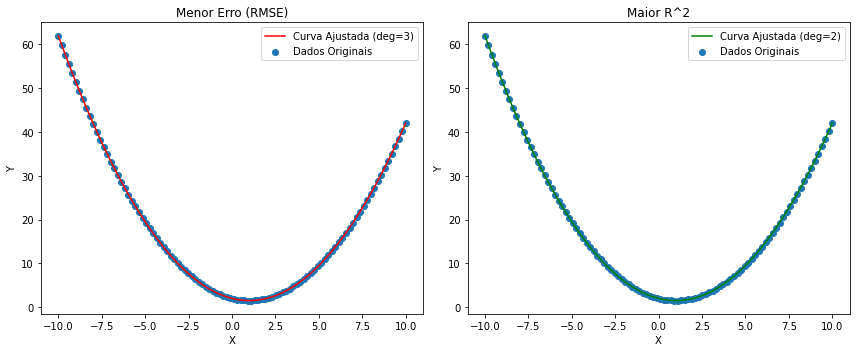

Melhor ajuste baseado no RMSE mínimo: deg = 3, RMSE = 4.80525251510103e-15
Melhor ajuste baseado no R^2 máximo: deg = 2, R^2 = 1.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada
#x = np.array([1, 2, 3, 4, 5])
#y = np.array([2, 3, 5, 8, 11])

# Listas para armazenar os valores do erro médio quadrático (RMSE) e dos coeficientes de determinação (R^2)
rmse_values = []
r2_values = []
polynomials = []

# Variar o parâmetro deg de 1 a 10
for deg in range(1, 30):
    # Ajuste de curva
    coefficients = np.polyfit(x, y, deg)
    polynomial = np.poly1d(coefficients)
    polynomials.append(polynomial)

    # Valores preditos pelo ajuste de curva
    y_pred = polynomial(x)

    # Calcular o RMSE e o R^2
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Armazenar os valores do RMSE e do R^2
    rmse_values.append(rmse)
    r2_values.append(r2)

# Encontrar o melhor ajuste com base no RMSE mínimo
best_deg_rmse = np.argmin(rmse_values) + 1
best_rmse = rmse_values[best_deg_rmse - 1]
best_polynomial_rmse = polynomials[best_deg_rmse - 1]

# Encontrar o melhor ajuste com base no R^2 máximo
best_deg_r2 = np.argmax(r2_values) + 1
best_r2 = r2_values[best_deg_r2 - 1]
best_polynomial_r2 = polynomials[best_deg_r2 - 1]

# Plot dos resultados
plt.figure(figsize=(12, 5))

# Plot dos pontos originais
plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Dados Originais')

# Plot da curva ajustada com menor erro (RMSE)
x_pred_rmse = np.linspace(min(x), max(x), 100)
y_pred_rmse = best_polynomial_rmse(x_pred_rmse)
plt.plot(x_pred_rmse, y_pred_rmse, color='red', label=f'Curva Ajustada (deg={best_deg_rmse})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Menor Erro (RMSE)')
plt.legend()

# Plot dos pontos originais
plt.subplot(1, 2, 2)
plt.scatter(x, y, label='Dados Originais')

# Plot da curva ajustada com maior R^2
x_pred_r2 = np.linspace(min(x), max(x), 100)
y_pred_r2 = best_polynomial_r2(x_pred_r2)
plt.plot(x_pred_r2, y_pred_r2, color='green', label=f'Curva Ajustada (deg={best_deg_r2})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Maior R^2')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Melhor ajuste baseado no RMSE mínimo: deg = {best_deg_rmse}, RMSE = {best_rmse}")
print(f"Melhor ajuste baseado no R^2 máximo: deg = {best_deg_r2}, R^2 = {best_r2}")
